In [220]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import sklearn as sk
import seaborn as sns

from sklearn import *
from math import *
from __future__ import division
%matplotlib inline 



# 1. Data Exploration 

Before diving into our data, let us first explore the dataset to get some understanding on what we are working with. We will seek to understand the following: 

- distribution of continuous variables 
- correlation of predictor variables with target variable, as well as any possible correlation between each feature 
- possible missing values or outliers 


In [221]:
#load data 
df = pd.read_csv(".\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [222]:
df.describe(include = "all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,5168-MSWXT,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [223]:
df.shape

(7043, 21)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


Text(0.5,1,'Percent of churn in customer')

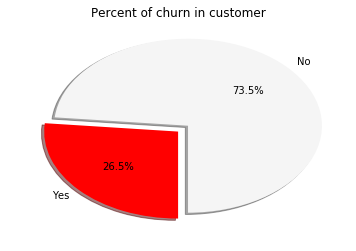

In [224]:
print(df["Churn"].value_counts(normalize = True))

# Data to plot
labels =df['Churn'].value_counts(sort = True).index
sizes = df['Churn'].value_counts(sort = True)


colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270)

plt.title('Percent of churn in customer')


About 26.5% of existing customers churned.

In [225]:
# check for missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Churn,0,0.0
OnlineSecurity,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0


In [226]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We notice that "TotalCharges" is stored as an object, instead of a float as we would expect.

Actually, there are some missing values for the "TotalCharges" column that is preventing us from converting the entire column to a float data type.

In [227]:
df.loc[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We notice that the tenure for these customers are 0. There could be several possibilities for this: 
    1. data entry errors 
    2. these customers are at the beginning of their contract (within 1st month of signing)
    
The result for "Churn" is "No" for all these customers. Thus, it is more likely that these customers are at the beginning of their contract. 

We will remove them from our dataset, as this data is not useful in predicting churn.

In [228]:
#remove empty values from total charges 

df = df.drop(df[df.TotalCharges == " "].index) # drop empty values 
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"]) #convert column to float data type 


In [229]:
df.describe() #distribution of numerical variables 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Distribution of Continuous Variables 
Let's start our data exploration by analysing the distribution of continuous variables. We will seek to identify how the distributions change with "Churn", as well as look out for any possible outliers. 

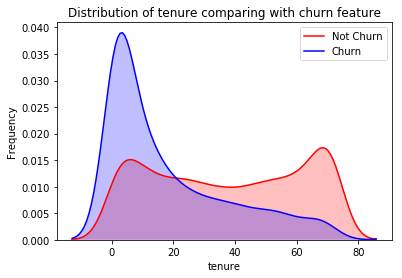

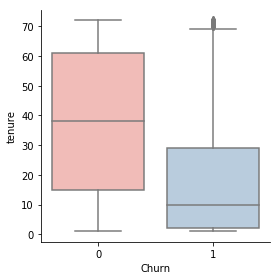

In [230]:
#relation between "tenure" and "Churn"

#preprocess churn 
df["Churn"] = df["Churn"].map(lambda s :1  if s =='Yes' else 0) 

# tenure distibution 
g = sns.kdeplot(df.tenure[(df["Churn"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(df.tenure[(df["Churn"] == 1) ], ax =g, color="Blue", shade= True)
g.set_xlabel("tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

#histogram for tenure 
g = sns.factorplot(x="Churn", y = "tenure",data = df, kind="box", palette = "Pastel1")

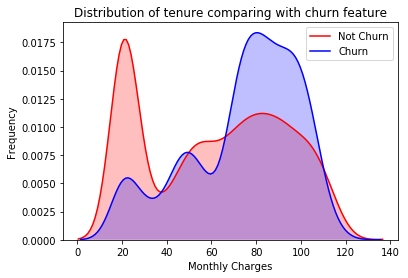

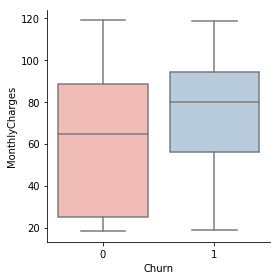

In [231]:
#relation between "MonthlyCharges" and "Churn"

# tenure distibution 
g = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ], ax =g, color="Blue", shade= True)
g.set_xlabel("Monthly Charges")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

#histogram for tenure 
g = sns.factorplot(x="Churn", y = "MonthlyCharges",data = df, kind="box", palette = "Pastel1")

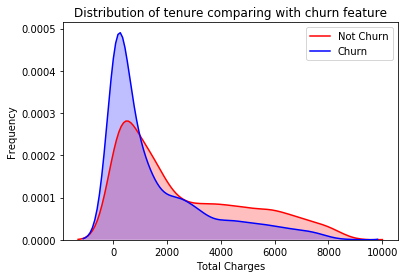

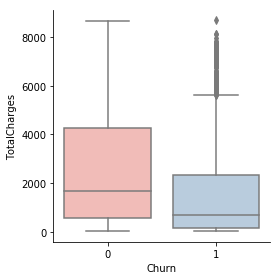

In [232]:
#relation between "TotalCharges" and "Churn"

# tenure distibution 
g = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ], ax =g, color="Blue", shade= True)
g.set_xlabel("Total Charges")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

#histogram for tenure 
g = sns.factorplot(x="Churn", y = "TotalCharges",data = df, kind="box", palette = "Pastel1")

We observe the following: 
- Customers whose tenure were less than 20 months had a higher probability of churning. 
- Customers whose monthly charges were more than $60 per month were also more likely to churn. 

### Correlation Between Categorical Variables and Churn. 
Next, we will try to learn about feature correlation by pivoting our categorical variables with "Churn". We will look out for features which may not be as important in predicting Customer Churn. 

In [233]:
#preprocess categorical variables 

df["Male"] = df["gender"].map(lambda s :1  if s =='Male' else 0) 
df["Female"] = df["gender"].map(lambda s :1  if s =='Female' else 0)  
df["Partner"] = df["Partner"].map(lambda s :1  if s =='Yes' else 0) 
df["Dependents"] = df["Dependents"].map(lambda s :1  if s =='Yes' else 0)  
df["PhoneService"] = df["PhoneService"].map(lambda s :1  if s =='Yes' else 0)  
df["PaperlessBilling"] = df["PaperlessBilling"].map(lambda s :1  if s =='Yes' else 0)   

df.head(n = 10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,Female
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,1
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,No,No,One year,0,Mailed check,56.95,1889.50,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,1
5,9305-CDSKC,Female,0,0,0,8,1,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1,0,1
6,1452-KIOVK,Male,0,0,1,22,1,Yes,Fiber optic,No,...,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,1,0
7,6713-OKOMC,Female,0,0,0,10,0,No phone service,DSL,Yes,...,No,No,Month-to-month,0,Mailed check,29.75,301.90,0,0,1
8,7892-POOKP,Female,0,1,0,28,1,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1,0,1
9,6388-TABGU,Male,0,0,1,62,1,No,DSL,Yes,...,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0,1,0


   gender     Churn
1    Male  0.262046
0  Female  0.269595


Text(0.5,0.98,'Gender vs Churn')

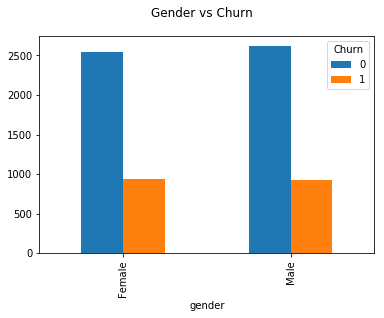

In [234]:
print(df[["gender", "Churn"]].groupby("gender", as_index = False).mean().sort_values(by = "Churn"))
pd.crosstab(df.gender,df.Churn, values = df["Churn"].values, aggfunc = len).plot(kind = "bar") 
plt.suptitle("Gender vs Churn")

   SeniorCitizen     Churn
0              0  0.236503
1              1  0.416813


Text(0.5,0.98,'SeniorCitizen vs Churn')

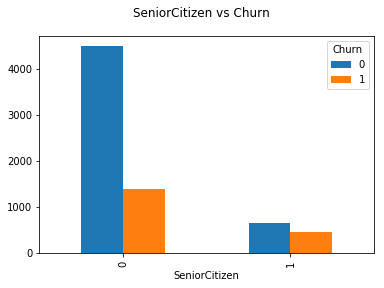

In [235]:
print(df[["SeniorCitizen", "Churn"]].groupby("SeniorCitizen", as_index = False).mean().sort_values(by = "Churn"))
pd.crosstab(df.SeniorCitizen,df.Churn, values = df["SeniorCitizen"].values, aggfunc = len).plot(kind = "bar") 
plt.suptitle("SeniorCitizen vs Churn")

   Partner     Churn
1        1  0.197171
0        0  0.329761


Text(0.5,0.98,'Partner vs Churn')

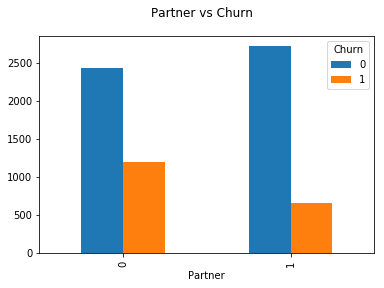

In [236]:
print(df[["Partner", "Churn"]].groupby("Partner", as_index = False).mean().sort_values(by = "Churn"))
pd.crosstab(df.Partner,df.Churn, values = df["Churn"].values, aggfunc = len).plot(kind = "bar") 
plt.suptitle("Partner vs Churn")

   Dependents     Churn
1           1  0.155312
0           0  0.312791


Text(0.5,0.98,'Dependents vs Churn')

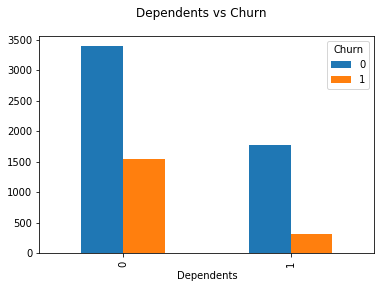

In [237]:
print(df[["Dependents", "Churn"]].groupby("Dependents", as_index = False).mean().sort_values(by = "Churn"))
pd.crosstab(df.Dependents,df.Churn, values = df["Churn"].values, aggfunc = len).plot(kind = "bar") 
plt.suptitle("Dependents vs Churn")

   PhoneService     Churn
0             0  0.250000
1             1  0.267475


Text(0.5,0.98,'Phone Service vs Churn')

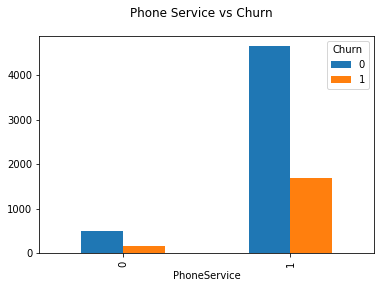

In [238]:
print(df[["PhoneService", "Churn"]].groupby("PhoneService", as_index = False).mean().sort_values(by = "Churn"))
pd.crosstab(df.PhoneService,df.Churn, values = df["Churn"].values, aggfunc = len).plot(kind = "bar") 
plt.suptitle("Phone Service vs Churn")

   PaperlessBilling     Churn
0                 0  0.163757
1                 1  0.335893


Text(0.5,0.98,'Paperless Billing vs Churn')

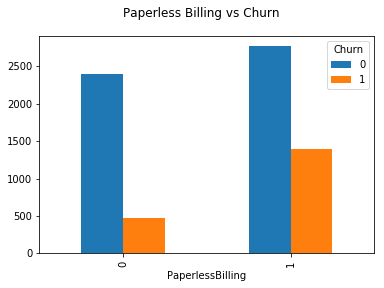

In [239]:
print(df[["PaperlessBilling", "Churn"]].groupby("PaperlessBilling", as_index = False).mean().sort_values(by = "Churn"))
pd.crosstab(df.PaperlessBilling,df.Churn, values = df["Churn"].values, aggfunc = len).plot(kind = "bar") 
plt.suptitle("Paperless Billing vs Churn")

   has_InternetService     Churn
0                    0  0.074342
1                    1  0.318578


Text(0.5,0.98,'has Internet Service vs Churn')

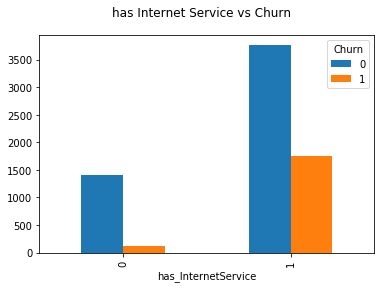

In [240]:
#column to check for internet service, similar to phone service. 
df["has_InternetService"] = df["InternetService"].map(lambda s: 0 if s == "No" else 1) 

print(df[["has_InternetService", "Churn"]].groupby("has_InternetService", as_index = False).mean().sort_values(by = "Churn"))
pd.crosstab(df.has_InternetService,df.Churn, values = df["Churn"].values, aggfunc = len).plot(kind = "bar") 
plt.suptitle("has Internet Service vs Churn")

We can observe the following from the above charts:  
- Gender and Phone Service was not important in predicting customer churn 
- Customers with partners and dependents were less likely to churn. 
- Customers with Internet Service and Paperless Billing had a higher probability of churning.
- Senior Citizens were also more likely to churn 


### Customer Services Data
In the next section, we will be checking if the type of services used (eg. multiple lines, online security, device protection) had an impact on customer churn.  


In [241]:
#pre-process labels 
internet_service = df.columns[9:15]
for x in internet_service: 
    df[x] = df[x].map(lambda s: 1 if s == "Yes" else 0)

df["MultipleLines"] = df["MultipleLines"].map(lambda s: 1 if s == "Yes" else 0)

In [242]:
df.head(n = 5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,Female,has_InternetService
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,1


In [243]:
for x in internet_service: 
    print(df[[x, "Churn"]].groupby(x, as_index = False).mean().sort_values(by = "Churn"))
    print("\n")
    
print(df[["MultipleLines", "Churn"]].groupby("MultipleLines", as_index = False).mean().sort_values(by = "Churn"))


   OnlineSecurity     Churn
1               1  0.146402
0               0  0.313733


   OnlineBackup     Churn
1             1  0.215670
0             0  0.292164


   DeviceProtection     Churn
1                 1  0.225393
0                 0  0.286953


   TechSupport     Churn
1            1  0.151961
0            0  0.312300


   StreamingTV     Churn
0            0  0.243705
1            1  0.301147


   StreamingMovies     Churn
0                0  0.244362
1                1  0.299524


   MultipleLines     Churn
0              0  0.250677
1              1  0.286485


Among internet services, we notice that we can categorise customers into two distinct groups: 
- Technical Customers (i.e those using security, backup and support) 
- Entertainment Customers (i.e those using streaming services)  

Technical customers appear to have a lower probability of churning, while entertainment customers exhibit the converse. Let's create two new columns to test our hypothesis. 

In [244]:
#create column to identify technical customers 
technical_services = internet_service[:4] 

technical_services_usage = [0] * df.shape[0] 

for col in technical_services: 
    technical_services_usage += df[col]
    
df["TechnicalCustomers"] = technical_services_usage.map(lambda s: 0 if s == 0 else 1)

print(df["TechnicalCustomers"].value_counts(normalize = True)) #proportion of techinical customers 
print("\n")

#create column to identify entertainment customers 
entertainment_services = internet_service[4:] 

entertainment_services_usage = [0] * df.shape[0]

for col in entertainment_services: 
    entertainment_services_usage += df[col] 

df["EntertainmentCustomers"] = entertainment_services_usage.map(lambda s:0 if s == 0 else 1) 

print(df["EntertainmentCustomers"].value_counts(normalize = True)) #proportion of entertainment customers 

1    0.603669
0    0.396331
Name: TechnicalCustomers, dtype: float64


0    0.502986
1    0.497014
Name: EntertainmentCustomers, dtype: float64


   TechnicalCustomers     Churn
1                   1  0.244523
0                   0  0.298170


Text(0.5,0.98,'Technical Customers vs Churn')

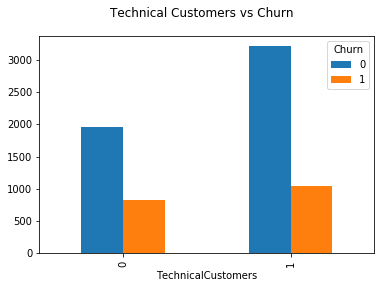

In [245]:
#Technical Customers vs Churn 

print(df[["TechnicalCustomers", "Churn"]].groupby("TechnicalCustomers", as_index = False).mean().sort_values(by = "Churn"))
pd.crosstab(df.TechnicalCustomers,df.Churn, values = df["Churn"].values, aggfunc = len).plot(kind = "bar") 
plt.suptitle("Technical Customers vs Churn")

   EntertainmentCustomers     Churn
0                       0  0.228442
1                       1  0.303577


Text(0.5,0.98,'Entertainment Customers vs Churn')

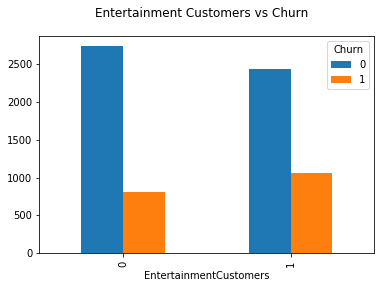

In [246]:
#Entertainment Customers vs Churn 
print((df[["EntertainmentCustomers", "Churn"]].groupby("EntertainmentCustomers", as_index = False).mean().sort_values(by = "Churn")))
              
pd.crosstab(df.EntertainmentCustomers,df.Churn, values = df["Churn"].values, aggfunc = len).plot(kind = "bar") 
plt.suptitle("Entertainment Customers vs Churn")

We observe that the probability of churning is slightly higher among Entertainment Customers. We will keep this feature in our dataset for now. 

### Customer Contract Data
Lastly, we will check for any correlation between the details of the customers' contract and if they churned. 


In [247]:
contract_details = ["Contract", "PaymentMethod"]
for x in contract_details: 
    print(df[[x, "Churn"]].groupby(x, as_index = False).mean().sort_values(by = "Churn"))
    print("\n")

         Contract     Churn
2        Two year  0.028487
1        One year  0.112772
0  Month-to-month  0.427097


               PaymentMethod     Churn
1    Credit card (automatic)  0.152531
0  Bank transfer (automatic)  0.167315
3               Mailed check  0.192020
2           Electronic check  0.452854




In [248]:
#create new variables, based on contract and payment method 
df["is_MonthlyContract"] = df["Contract"].map(lambda s: 1 if s == "Month-to-month" else 0)
df["is_ElectronicCheck"] = df["PaymentMethod"].map(lambda s: 1 if s == "Electronic check" else 0)

We observe that customers on monthly contracts and those using electronic checks as their payment method were more likely to churn compared to the others. We have created two new features so that we can check for this easiy. 

### Correlation between Feature Variables 
In this portion, we will look at how the feature variables are related (or not) to each other.  

Text(0.5,0.98,'Demographic Correlation Matrix')

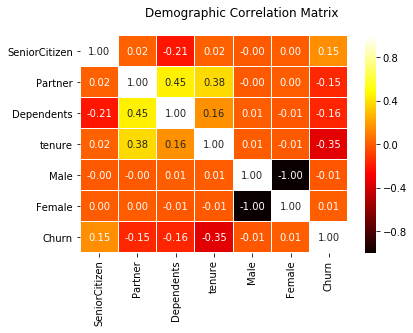

In [249]:
demographics = df[['SeniorCitizen','Partner','Dependents','tenure','Male','Female','Churn']]

g = sns.heatmap(demographics[list(demographics)].corr(),cmap = "hot",fmt=".2f",annot=True,linewidths= 0.01) 

plt.suptitle("Demographic Correlation Matrix")

Text(0.5,0.98,'Phone Data Correlation Matrix')

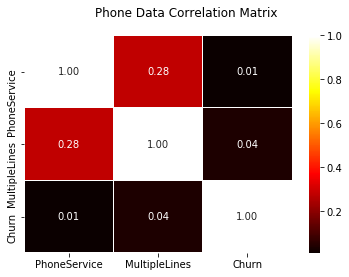

In [250]:
phone_data = df[['PhoneService','MultipleLines','Churn']]
g = sns.heatmap(phone_data[list(phone_data)].corr(),cmap = "hot",fmt=".2f",annot=True,linewidths= 0.01)
plt.suptitle("Phone Data Correlation Matrix")

Text(0.5,0.98,'Internet Data Correlation Matrix')

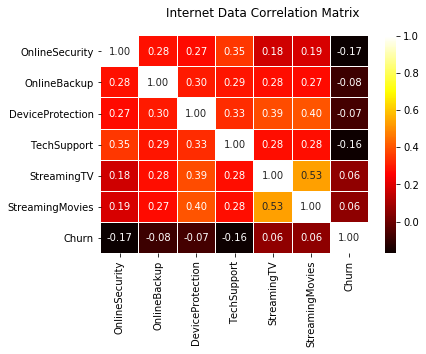

In [251]:
internet_data = df[["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Churn"]]
g = sns.heatmap(internet_data[list(internet_data)].corr(),cmap = "hot",fmt=".2f",annot=True,linewidths= 0.01)
plt.suptitle("Internet Data Correlation Matrix")

Text(0.5,0.98,'Contract Data Correlation Matrix')

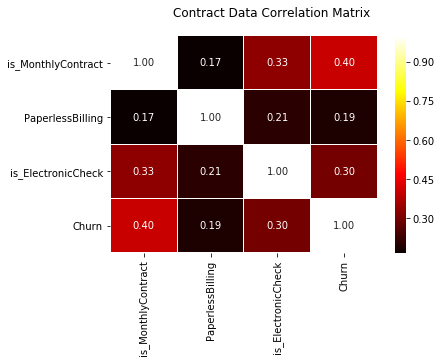

In [252]:
contract_data = df[["is_MonthlyContract", "PaperlessBilling", "is_ElectronicCheck", "Churn"]]
g = sns.heatmap(contract_data[list(contract_data)].corr(),cmap = "hot",fmt=".2f",annot=True,linewidths= 0.01)
plt.suptitle("Contract Data Correlation Matrix")

Text(0.5,0.98,'Continuous Data Correlation Matrix')

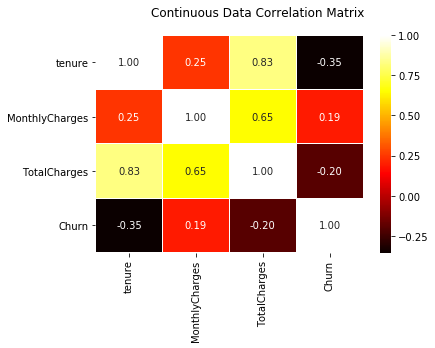

In [253]:
g = sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges', "Churn"]].corr(),cmap = "hot",fmt=".2f",annot=True,linewidths= 0.01)
plt.suptitle("Continuous Data Correlation Matrix")

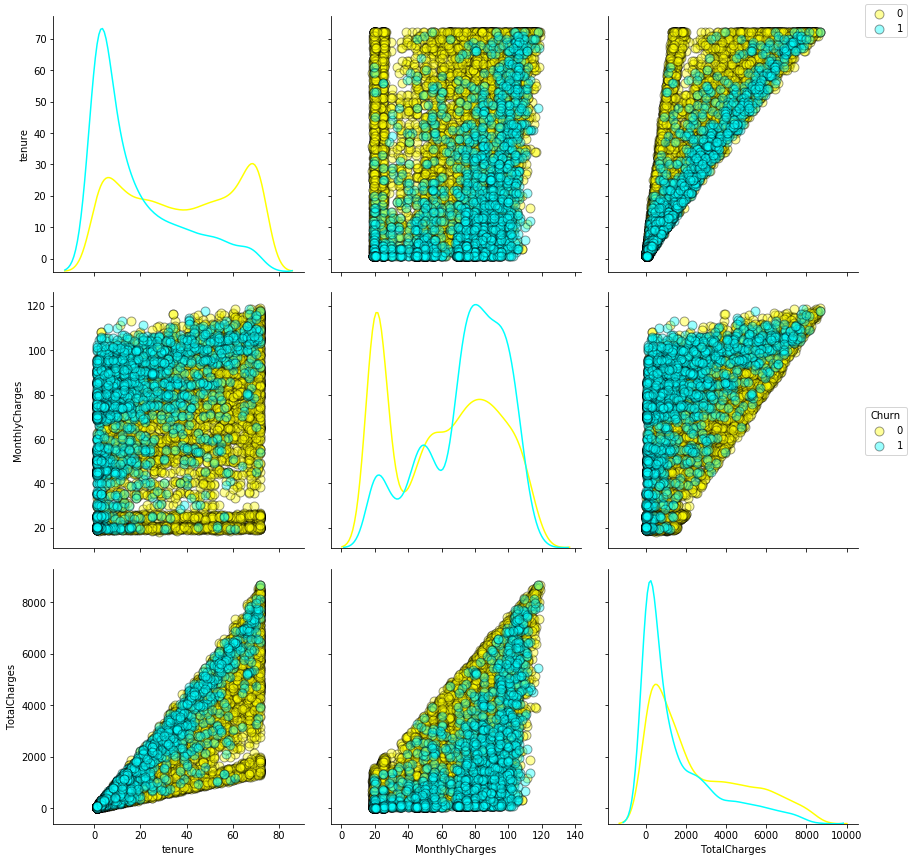

In [254]:
# scatter plot matrix for tenure, monthly charges and total charges

g = sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges', "Churn"]], 
                 vars = ['tenure','MonthlyCharges','TotalCharges'], 
                 hue="Churn", diag_kind = 'kde', 
                 plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},         
                 palette = ['yellow','cyan'],
                 size = 4) 

g.fig.legend(handles = g._legend_data.values())



The correlation matrices suggest that there are no categorical variables which appear to be strongly correlated with each other. This can be seen as their correlation coefficients generally fall below 0.5. 

Although there appears to be a strong correlation between our continuous variables (tenure and Total Charges, Total Charges and Monthly Charges), this makes sense since they are a function of each other. Thus, leaving these features in the dataset should not affect its performance. 

The scatter plot matrix provides a better understanding of the continuous data, as well as those customers which churned.

# 2. Data Mungling

Having analysed our data, we now have a better idea on which variables are more important for predicting Churn. We will now create the following variables, based on our earlier findings: 

- Number of relationships (partner + dependents) 
- Change in contract 

We will also drop the variables which are not required in our analysis. 

In [255]:
df["relationship_count"] = df["Partner"] + df["Dependents"]

In [256]:
df["charge_per_tenure"] = df["TotalCharges"] / df["tenure"]

df[["charge_per_tenure", "MonthlyCharges"]].head()

,charge_per_tenure,MonthlyCharges
0,29.850000,29.85
1,55.573529,56.95
2,54.075000,53.85
3,40.905556,42.30
4,75.825000,70.70


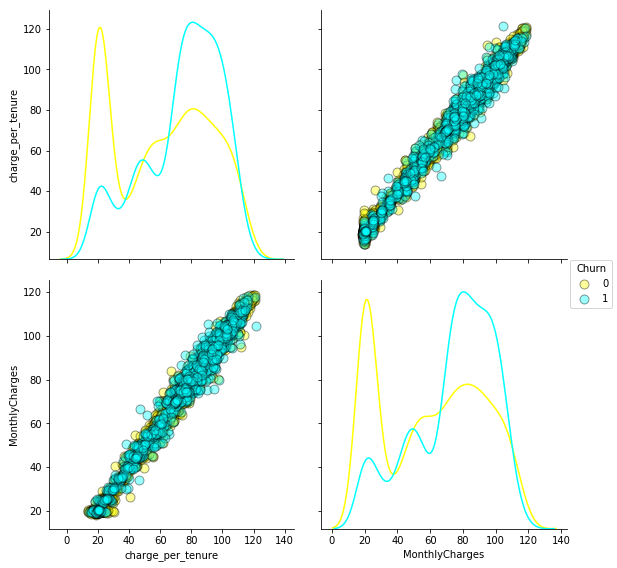

In [257]:
g = sns.pairplot(df[["charge_per_tenure", "MonthlyCharges", "Churn"]], 
                 vars = ["charge_per_tenure", "MonthlyCharges"], 
                 hue = "Churn", diag_kind = 'kde', 
                 plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},         
                 palette = ['yellow','cyan'],
                 size = 4) 

The above matrix confirms that there were indeed some customers who had changed their monthly plans. This can be observed since there are points in the scatter plot which do not lie directly on each other. 

In [258]:
#compare charge per tenure and binarise accordingly
df["changed_monthly_plan"] = abs(df["charge_per_tenure"] - df["MonthlyCharges"] )
df["changed_monthly_plan"] = df["changed_monthly_plan"].map(lambda s:1 if s > 2 else 0)

#drop charge_per_tenure 
df.drop(["charge_per_tenure"], axis = 1, inplace = True)

#find out how many customers changed their monthly plans
df["changed_monthly_plan"].value_counts(normalize = True)

0    0.689278
1    0.310722
Name: changed_monthly_plan, dtype: float64

   changed_monthly_plan     Churn
0                     0  0.231071
1                     1  0.342792


Text(0.5,0.98,'Changed Monthly Plan vs Normal Customers')

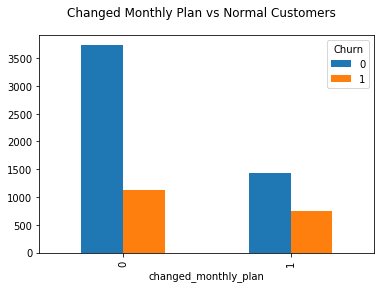

In [259]:
print((df[["changed_monthly_plan", "Churn"]].groupby("changed_monthly_plan", as_index = False).mean().sort_values(by = "Churn")))
pd.crosstab(df.changed_monthly_plan,df.Churn, values = df["Churn"].values, aggfunc = len).plot(kind = "bar")
plt.suptitle("Changed Monthly Plan vs Normal Customers")

In [260]:
#remove non-important variables 
df.drop(["Female", "Male", "customerID", "gender", "Partner", "Dependents", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"], axis = 1, inplace = True)
df.drop(["StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"], axis = 1, inplace = True) 

In [261]:
df.head(n = 5)

,SeniorCitizen,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,has_InternetService,TechnicalCustomers,EntertainmentCustomers,is_MonthlyContract,is_ElectronicCheck,relationship_count,changed_monthly_plan
0,0,1,0,0,1,29.85,29.85,0,1,1,0,1,1,1,0
1,0,34,1,0,0,56.95,1889.50,0,1,1,0,0,0,0,0
2,0,2,1,0,1,53.85,108.15,1,1,1,0,1,0,0,0
3,0,45,0,0,0,42.30,1840.75,0,1,1,0,0,0,0,0
4,0,2,1,0,1,70.70,151.65,1,1,0,0,1,1,0,1


# 3. Data Modelling 
Finally, our data is prepared and ready for modelling. The type of models we choose should be based on the type of problem which we are seeking to solve. In this case, our problem is a regression and classification one. We seek to establish a relationship between an output feature (Churn), and identify the variables which impact this (eg. type of contract, customer tenure). 

We will be using the following models: 
1. Logistic Regression 
2. Decision Trees
3. Adaboost
4. Random Forest 

The models will be evaluated based on their accuracy, and AUROC.

In [262]:
#prep data 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import train_test_split

#intialise scaler 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

y = df["Churn"]

#drop Churn from dataset 
df.drop(["Churn"], axis = 1, inplace = True)

#get list of feature variables
features = list(df)

X = df[features] 

# Split train data: 70% for model fit, 30% for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=12345 )

In [263]:
#logistic regression model 
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l1', C=100, random_state=0, class_weight = "balanced")
lr.fit(X=X_train, y=y_train) 

y_pred = lr.predict(X_valid)  

acc_lr = accuracy_score(y_pred, y_valid)
print("Accuracy for logsitic regression model is " + str(acc_lr * 100) + "%") 

cm = confusion_matrix(y_valid, y_pred)
print(cm)

Accuracy for logsitic regression model is 74.64454976303317%
[[1117  416]
 [ 119  458]]


In [286]:
coeff_df = pd.DataFrame(features)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
10,is_MonthlyContract,1.103207
11,is_ElectronicCheck,0.478081
4,PaperlessBilling,0.334044
0,SeniorCitizen,0.267110
7,has_InternetService,0.253260
3,MultipleLines,0.169094
5,MonthlyCharges,0.029270
6,TotalCharges,0.000164
1,tenure,-0.048771
12,relationship_count,-0.054219


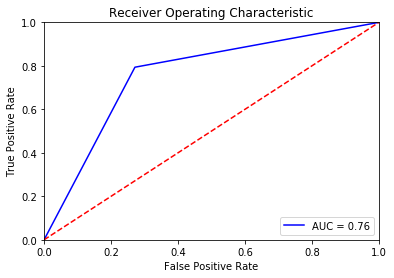

In [264]:
from sklearn.metrics import roc_curve, auc

# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_valid, y_pred) 
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [265]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier 

Ada = AdaBoostClassifier(n_estimators = 100)
Ada.fit(X_train, y_train)

Ada_predict = Ada_model.predict(X_valid) 

acc_adaboost = accuracy_score(Ada_predict, y_valid)
print("Accuracy score for Adaboost model is " + str(acc_adaboost * 100) + "%")

cm = confusion_matrix(y_valid, Ada_predict) 
print(cm) 

Accuracy score for Adaboost model is 80.42654028436019%
[[1389  144]
 [ 269  308]]


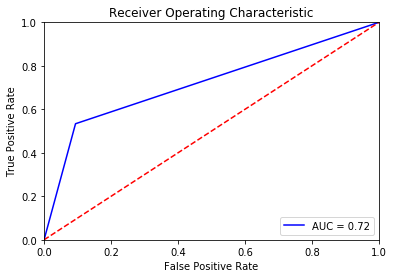

In [266]:
from sklearn.metrics import roc_curve, auc

# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_valid, Ada_predict) 
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [267]:
#Decision Tree Anlysis, using Gini as the attribute selection criteria 
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 12345, min_samples_leaf=5)
clf_gini.fit(X_train, y_train) 

y_pred_gini = clf_gini.predict(X_valid)  

acc_gini = accuracy_score(y_pred_gini, y_valid)
print("Accuracy for gini decision tree is " + str(acc_gini * 100) + "%") 

cm = confusion_matrix(y_valid, y_pred_gini) 
print(cm)

Accuracy for gini decision tree is 76.01895734597156%
[[1313  220]
 [ 286  291]]


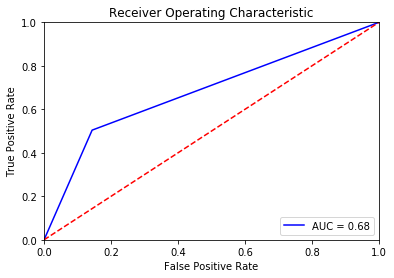

In [268]:
from sklearn.metrics import roc_curve, auc

# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_valid, y_pred_gini) 
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [269]:
from sklearn.ensemble import RandomForestClassifier
from math import sqrt, log 

# Fit Random Forest Model; Binary Splitting using Entropy
RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0, max_features = int(sqrt(15)))
RF.fit(X_train, y_train)

RF_predict = RF_model.predict(X_valid) 

acc_RF = accuracy_score(RF_predict, y_valid)
print("Accuracy score for random forest model is " + str(acc_RF * 100) + "%")

cm = confusion_matrix(y_valid, RF_predict)
print(cm)

Accuracy score for random forest model is 78.67298578199052%
[[1376  157]
 [ 293  284]]


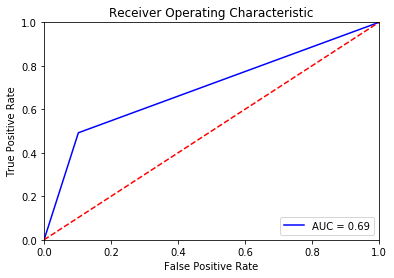

In [270]:
from sklearn.metrics import roc_curve, auc

# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_valid, RF_predict) 
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Model Evaluation 
Now, we can rank our models to choose the best one for our problem set. 

In [271]:
models = pd.DataFrame({
    'Model': ["Logistic Regression", 
             "AdaBoost", 
             "Decision Tree", 
             "Random Forest"],
    'Score': [acc_lr, 
             acc_adaboost, 
             acc_gini, 
             acc_RF]})

models.sort_values(by='Score', ascending=False)

,Model,Score
1,AdaBoost,0.804265
3,Random Forest,0.786730
2,Decision Tree,0.760190
0,Logistic Regression,0.746445


### Model Parameter Tuning  

We can use cross-validation to improve our predictive models as well, by finding the hyperparamter values so that we can produce the best model.   

In [274]:
from sklearn.model_selection import GridSearchCV 

#tuning decision tree 

# Create criterion space
criterion = ['entropy', 'gini']

# Create class weight space 
class_weight = ["balanced", None] 

#create max features space 
max_features = ["sqrt", "auto", "log2", 10, None]

#create min sample split space 
min_samples_split = [2,5] 

#create min sample leaf space 
min_samples_leaf = [1, 2, 5, 10] 

# Create hyperparameter options
hyperparameters = dict(criterion = criterion,
                       class_weight = class_weight, 
                       min_samples_split = min_samples_split, 
                       min_samples_leaf = min_samples_leaf) 

In [275]:
# Create grid search using 5-fold cross validation
decision_tree_best = GridSearchCV(clf_gini, hyperparameters, cv=5, verbose=0) 

# Fit grid search
decision_tree_best.fit(X, y) 

# View best hyperparameters
print('Best Criterion:', best_model.best_estimator_.get_params()['criterion'])
print("Best Class Weight:", best_model.best_estimator_.get_params()["class_weight"])
print("Best Max Features:", best_model.best_estimator_.get_params()["max_features"])
print("Best Min Samples Split:", best_model.best_estimator_.get_params()["min_samples_split"])
print("Best Min Samples Leaf:", best_model.best_estimator_.get_params()["min_samples_leaf"])

Best Criterion: entropy
Best Class Weight: None
Best Max Features: None
Best Min Samples Split: 2
Best Min Samples Leaf: 10


In [276]:
acc_decision_tree_best = accuracy_score(best_model.predict(X_valid), y_valid) 

print("Tuned Decision Tree accuracy is: " + str(acc_clf * 100) + "%")

Tuned Decision Tree accuracy is: 84.40758293838863%


In [277]:
#tuning random forest  

# Create criterion space
criterion = ['entropy', 'gini']

# Create class weight space 
class_weight = ["balanced", None] 

#create max features space 
max_features = ["sqrt", "auto", "log2", 10, None]

#create min sample split space 
min_samples_split = [2,5] 

#create min sample leaf space 
min_samples_leaf = [1, 2, 5, 10] 

# Create hyperparameter options
hyperparameters = dict(criterion = criterion,
                       class_weight = class_weight, 
                       min_samples_split = min_samples_split, 
                       min_samples_leaf = min_samples_leaf) 

In [278]:
# Create grid search using 5-fold cross validation
random_forest_best = GridSearchCV(RF, hyperparameters, cv=5, verbose=0) 

# Fit grid search
random_forest_best.fit(X, y) 

# View best hyperparameters
print('Best Criterion:', best_model.best_estimator_.get_params()['criterion'])
print("Best Class Weight:", best_model.best_estimator_.get_params()["class_weight"])
print("Best Max Features:", best_model.best_estimator_.get_params()["max_features"])
print("Best Min Samples Split:", best_model.best_estimator_.get_params()["min_samples_split"])
print("Best Min Samples Leaf:", best_model.best_estimator_.get_params()["min_samples_leaf"])

Best Criterion: entropy
Best Class Weight: None
Best Max Features: None
Best Min Samples Split: 2
Best Min Samples Leaf: 10


In [279]:
acc_random_forest_best = accuracy_score(random_forest_best.predict(X_valid), y_valid) 

print("Tuned Random Forest accuracy is: " + str(acc_random_forest_best * 100) + "%")

Tuned Random Forest accuracy is: 86.87203791469194%


In [280]:
#tuning Adaboost model 

#create decision tree classifier, based on the prescribed parameters 
decision_tree = DecisionTreeClassifier(criterion = "entropy", 
                                      min_samples_split = 2, 
                                      min_samples_leaf = 10) 

base_estimator = [decision_tree, None]
n_estimators = [25, 50, 100] 
learning_rate = [0.5, 1.0, 1.5] 

# Create hyperparameter options
hyperparameters_adaboost = dict(base_estimator = base_estimator, 
                       n_estimators = n_estimators, 
                       learning_rate = learning_rate) 


In [281]:
# Create grid search using 5-fold cross validation
adaboost_best = GridSearchCV(Ada, hyperparameters_adaboost, cv=5, verbose=0) 

# Fit grid search
adaboost_best.fit(X, y) 

# View best hyperparameters 
print("Best base estimator:", adaboost_best.best_estimator_.get_params()["base_estimator"])
print("Best n estimators:", adaboost_best.best_estimator_.get_params()["n_estimators"])
print("Best Learning Rate:", adaboost_best.best_estimator_.get_params()["learning_rate"])
 

Best base estimator: None
Best n estimators: 100
Best Learning Rate: 0.5


In [282]:
acc_adaboost_best = accuracy_score(adaboost_best.predict(X_valid), y_valid)

print("Tuned Adaboost accuracy is: " + str(acc_adaboost_best * 100) + "%")

Tuned Adaboost accuracy is: 81.09004739336493%


In [283]:
models["Tuned Scores"] = [0, 
                         acc_adaboost_best, 
                         acc_decision_tree_best, 
                         acc_random_forest_best] 

models.sort_values(by='Tuned Scores', ascending=False)

,Model,Score,Tuned Scores
3,Random Forest,0.786730,0.868720
2,Decision Tree,0.760190,0.844076
1,AdaBoost,0.804265,0.810900
0,Logistic Regression,0.746445,0.000000


The above table shows the updated scores for our models after carrying out hyperparameter tuning. We did not tune our logistic regression model, as the grid search method took too much time to run. 

With better computing power, we might have been able to yield an even better logistic regression model given how the initial model performed without any tuning. 